In [26]:
import numpy as np
import pandas as pd

print(np.__version__)
print(pd.__version__)

2.1.2
2.2.3


In [27]:
import os
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print("PATH:", os.environ.get('PATH'))

PYTHONPATH: None
PATH: /Users/davidholcer/GitHub/BattleBotsTemplate/ParseResults/myenv/bin:/Users/davidholcer/.opam/default/bin:/Library/Frameworks/Python.framework/Versions/3.13/bin:/Users/davidholcer/Library/Python/3.13:/usr/local/bin/python3:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Users/davidholcer/.oh-my-zsh/custom/plugins/ansiweather:/opt/local/bin:/opt/local/sbin:/Users/davidholcer/.rvm/bin


In [28]:
import sys
print(sys.executable)


/Users/davidholcer/GitHub/BattleBotsTemplate/ParseResults/myenv/bin/python


In [29]:
import json
import pandas as pd
import re
from datetime import datetime
from collections import Counter
from nltk import ngrams
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


# Load JSON files (replace with your actual paths)
with open('posts.json', 'r') as f:
    posts_data = json.load(f)

with open('users.json', 'r') as f:
    users_data = json.load(f)

# Separate posts by bots (alphanumeric) vs real accounts (numeric)
bot_posts = []
real_posts = []

# Function to check if author_id is bot (alphanumeric) or real (numeric)
def is_bot(author_id):
    return any(char.isalpha() for char in author_id)

for post in posts_data['posts']:
    if is_bot(post['author_id']):
        bot_posts.append(post)
    else:
        real_posts.append(post)

# Create DataFrames for easier manipulation
posts_df = pd.DataFrame(posts_data['posts'])
users_df = pd.DataFrame(users_data['users'])


In [30]:
users_df

,id,tweet_count,z_score,username,name,description,location,detectors
0,e66dd811-edd2-485c-9da7-0e545af6a528,0,0.000000,aaronjayjack,Aaron Jayjack,"Storm Chaser. YouTube, Videographer, Photograp...",None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
1,43fce198-5fcb-4afb-92ce-6971cbb29a2e,0,0.000000,davidholcer,David Holcer,"Creating & Coding: Generative Art, Graphic Des...",None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
2,e66dd811-edd2-485c-9da7-0e545af6a528,2,0.000000,aaronjayjack,Aaron Jayjack,"Storm Chaser. YouTube, Videographer, Photograp...",None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
3,43fce198-5fcb-4afb-92ce-6971cbb29a2e,4,0.000000,davidholcer,David Holcer,"Creating & Coding: Generative Art, Graphic Des...",None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
4,e66dd811-edd2-485c-9da7-0e545af6a528,11,0.000000,aaronjayjack,Aaron Jayjack,"Storm Chaser. YouTube, Videographer, Photograp...",None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
...,...,...,...,...,...,...,...,...
438,1963588872,26,-0.003809,USA1LandofFree,Mike Bartlett,,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
439,785567936,80,2.595161,mavsmarie,mavsmarie,delusional #mffl,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
440,1739406020512727040,86,2.883936,Santos1100011,Santos,MAN U✖️RASMUS✖️REAL MADRID✖️VINI JR✖️BARCA✖️YA...,Idk,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
441,1646259756011515905,8,-0.870132,herinterludee,ًًً,18 🇬🇭 • blessed & highly favoured 💌🎧🎀🦢// free ...,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."


<!-- ## Getting N-gram Info
current problems: just single word, bi-gram, expand to tri, up to n
 -->

In [31]:
# # Function to extract n-grams (bigrams, trigrams, etc.)
# def extract_ngrams(text, num):
#     tokens = re.findall(r'\b\w+\b', text.lower())
#     return list(ngrams(tokens, num))

# # Apply n-gram extraction to posts
# bot_texts = [post['text'] for post in bot_posts]
# real_texts = [post['text'] for post in real_posts]

# # Bigrams and trigrams (adjust as needed)
# bot_bigrams = Counter([gram for text in bot_texts for gram in extract_ngrams(text, 2)])
# real_bigrams = Counter([gram for text in real_texts for gram in extract_ngrams(text, 2)])

# # Example: Display top 10 bigrams for bots and real accounts
# print("Top 10 Bot Bigrams:", bot_bigrams.most_common(10))
# print("Top 10 Real Account Bigrams:", real_bigrams.most_common(10))

In [32]:
# from nltk.util import everygrams

# # Function to extract n-grams from text (from unigrams to n-grams)
# def extract_n_grams(text, n):
#     tokens = re.findall(r'\b\w+\b', text.lower())
#     return list(everygrams(tokens, max_len=n))

# # Apply n-gram extraction to posts
# bot_texts = [post['text'] for post in bot_posts]
# real_texts = [post['text'] for post in real_posts]

# # Apply n-gram extraction (up to n-grams, e.g., 3-grams or more if desired)
# bot_n_grams = Counter([gram for text in bot_texts for gram in extract_n_grams(text, 3)])
# real_n_grams = Counter([gram for text in real_texts for gram in extract_n_grams(text, 3)])

# # Example: Display top 10 n-grams for bots and real accounts
# print("Top 10 Bot N-grams:", bot_n_grams.most_common(10))
# print("Top 10 Real Account N-grams:", real_n_grams.most_common(10))


In [33]:
import json
from collections import Counter
import re
from nltk.util import everygrams
import nltk
nltk.download()
from nltk.corpus import stopwords


# bot_posts = [post for post in posts_data['posts'] if is_bot(post['author_id'])]
# real_posts = [post for post in posts_data['posts'] if not is_bot(post['author_id'])]

def extract_n_grams(text, n):
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in re.findall(r'\b\w+\b', text) if word.lower() not in stop_words]
    return list(everygrams(tokens, max_len=n))

# Apply n-gram extraction to posts
bot_texts = [post['text'] for post in bot_posts]
real_texts = [post['text'] for post in real_posts]

# Apply n-gram extraction (up to 3-grams)
bot_n_grams = Counter([gram for text in bot_texts for gram in extract_n_grams(text, 3)])
real_n_grams = Counter([gram for text in real_texts for gram in extract_n_grams(text, 3)])

# Display top 10 n-grams for bots and real accounts
print("Top 10 Bot N-grams:", bot_n_grams.most_common(10))
print("Top 10 Real Account N-grams:", real_n_grams.most_common(10))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
Top 10 Bot N-grams: [(('n',), 15), (('let',), 13), (('ud83d',), 12), (('game',), 10), (('n', 'n'), 9), (('never',), 9), (('every',), 9), (('co',), 8), (('co', 'twitter_link'), 8), (('twitter_link',), 8)]
Top 10 Real Account N-grams: [(('co',), 5913), (('https',), 5910), (('https', 'co'), 5910), (('https', 'co', 'twitter_link'), 5910), (('co', 'twitter_link'), 5910), (('twitter_link',), 5910), (('like',), 1037), (('mention',), 884), (('game',), 599), (('get',), 584)]


<!-- ## Getting text stats
current problems: unreadable, describe number of links total compared to total number of tweets, and total word count for both bots and nonbots. -->

In [34]:
# # Function to count links, hashtags, and special characters
# def count_features(text):
#     links = len(re.findall(r'http[s]?://\S+', text))
#     hashtags = len(re.findall(r'#\w+', text))
#     special_chars = len(re.findall(r'[\W_]', text))  # Example: emoji, punctuation
#     return links, hashtags, special_chars

# # Apply to bot and real posts
# bot_features = [count_features(post['text']) for post in bot_posts]
# real_features = [count_features(post['text']) for post in real_posts]

# # Convert to DataFrames for easier analysis
# bot_features_df = pd.DataFrame(bot_features, columns=['links', 'hashtags', 'special_chars'])
# real_features_df = pd.DataFrame(real_features, columns=['links', 'hashtags', 'special_chars'])

# # Example: Display overall feature stats
# print("Bot Feature Stats:\n", bot_features_df.describe())
# print("Real Account Feature Stats:\n", real_features_df.describe())


In [35]:
# Count features and words
def count_text_stats(text):
    links = len(re.findall(r'http[s]?://\S+', text))
    hashtags = len(re.findall(r'#\w+', text))
    special_chars = len(re.findall(r'[\W_]', text))  # Example: emojis, punctuation
    word_count = len(re.findall(r'\b\w+\b', text))  # Word count
    return links, hashtags, special_chars, word_count

# Apply text stat extraction
bot_stats = [count_text_stats(post['text']) for post in bot_posts]
real_stats = [count_text_stats(post['text']) for post in real_posts]

# Convert to DataFrame for easier analysis
bot_stats_df = pd.DataFrame(bot_stats, columns=['links', 'hashtags', 'special_chars', 'word_count'])
real_stats_df = pd.DataFrame(real_stats, columns=['links', 'hashtags', 'special_chars', 'word_count'])

# Summarize totals and ratios
bot_total = len(bot_posts)
real_total = len(real_posts)

bot_links_total = bot_stats_df['links'].sum()
real_links_total = real_stats_df['links'].sum()

bot_word_count_total = bot_stats_df['word_count'].sum()
real_word_count_total = real_stats_df['word_count'].sum()

# Print out the results
print(f"Total Bot Posts: {bot_total}, Total Real Account Posts: {real_total}")
print(f"Bot Links Total: {bot_links_total}, Real Account Links Total: {real_links_total}")
print(f"Bot Word Count Total: {bot_word_count_total}, Real Account Word Count Total: {real_word_count_total}")

# Calculate averages
bot_avg_links = bot_links_total / bot_total if bot_total > 0 else 0
real_avg_links = real_links_total / real_total if real_total > 0 else 0

bot_avg_words = bot_word_count_total / bot_total if bot_total > 0 else 0
real_avg_words = real_word_count_total / real_total if real_total > 0 else 0

print(f"Average Links per Bot Post: {bot_avg_links:.2f}")
print(f"Average Links per Real Account Post: {real_avg_links:.2f}")
print(f"Average Words per Bot Post: {bot_avg_words:.2f}")
print(f"Average Words per Real Account Post: {real_avg_words:.2f}")

Total Bot Posts: 126, Total Real Account Posts: 10875
Bot Links Total: 8, Real Account Links Total: 5910
Bot Word Count Total: 1851, Real Account Word Count Total: 211754
Average Links per Bot Post: 0.06
Average Links per Real Account Post: 0.54
Average Words per Bot Post: 14.69
Average Words per Real Account Post: 19.47


<!-- ## Getting Time distribution heatmap
current problems: show two heatmaps for bots vs. nonbots. make the heatmaps hours compared to user. add barchart similar to following code:

```
import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
``` -->

In [36]:
# # Convert post timestamps to datetime and extract relevant time components
# posts_df['created_at'] = pd.to_datetime(posts_df['created_at'])
# posts_df['hour'] = posts_df['created_at'].dt.hour
# posts_df['day'] = posts_df['created_at'].dt.day

# # Generate a heatmap of post times (hour vs day)
# heatmap_data = posts_df.pivot_table(index='day', columns='hour', aggfunc='size', fill_value=0)

# # Plot the heatmap
# sns.heatmap(heatmap_data, cmap="YlGnBu")
# plt.title("Heatmap of Post Times")
# plt.show()


In [37]:
# # Create hour-based heatmap data for bots and real accounts
# bot_posts_df = pd.DataFrame(bot_posts)
# real_posts_df = pd.DataFrame(real_posts)

# bot_posts_df['created_at'] = pd.to_datetime(bot_posts_df['created_at'])
# real_posts_df['created_at'] = pd.to_datetime(real_posts_df['created_at'])

# # Extract hours for the heatmap
# bot_posts_df['hour'] = bot_posts_df['created_at'].dt.hour
# real_posts_df['hour'] = real_posts_df['created_at'].dt.hour

# # Create heatmaps (hours vs number of posts)
# bot_heatmap_data = bot_posts_df.pivot_table(index='author_id', columns='hour', aggfunc='size', fill_value=0)
# real_heatmap_data = real_posts_df.pivot_table(index='author_id', columns='hour', aggfunc='size', fill_value=0)

# # Plotting the heatmaps side by side
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# sns.heatmap(bot_heatmap_data, cmap="YlGnBu")
# plt.title("Bot Post Time Heatmap")

# plt.subplot(1, 2, 2)
# sns.heatmap(real_heatmap_data, cmap="YlGnBu")
# plt.title("Real Account Post Time Heatmap")

# plt.show()

# # Bar chart similar to the previous example
# sns.set_theme(style="ticks")
# g = sns.JointGrid(data=real_posts_df, x="hour", y="created_at", marginal_ticks=True)

# g.plot_joint(
#     sns.histplot, discrete=(True, False),
#     cmap="light:#03012d", pmax=.8, cbar=True
# )
# g.plot_marginals(sns.histplot, element="step", color="#03012d")
# plt.show()


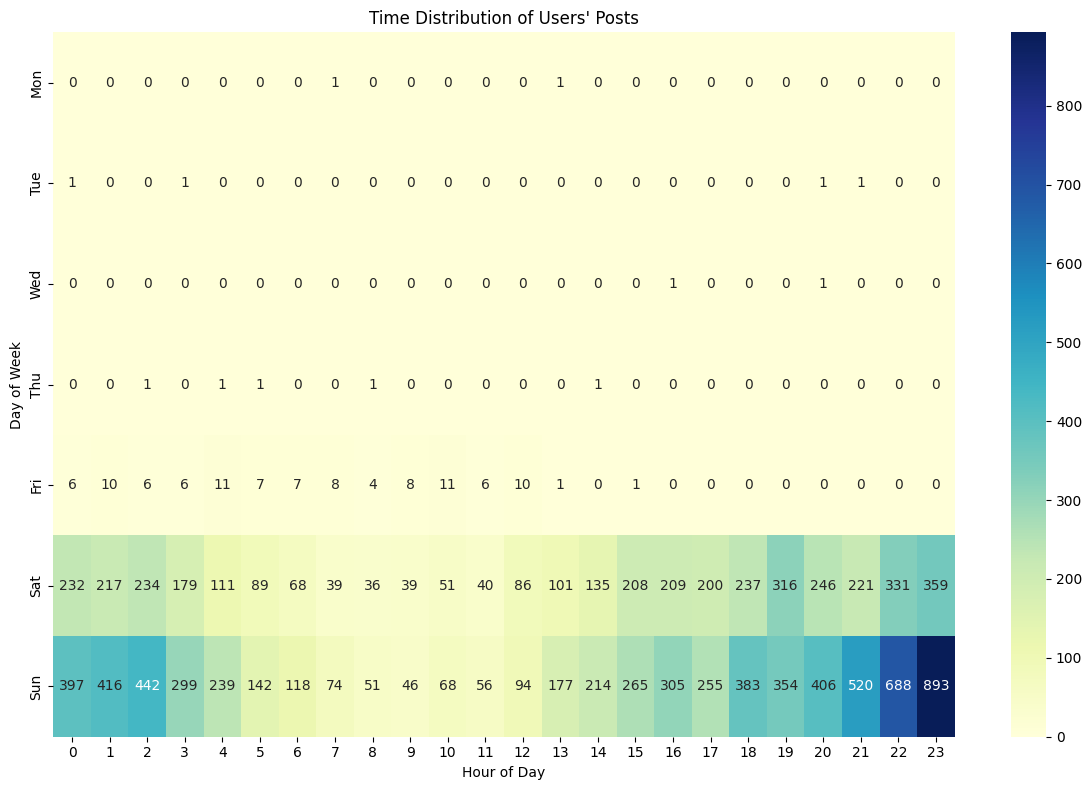

In [38]:

import numpy as np

# Prepare post data for heatmap
posts_df = pd.DataFrame(posts_data['posts'])
posts_df['created_at'] = pd.to_datetime(posts_df['created_at'])
posts_df['hour'] = posts_df['created_at'].dt.hour
posts_df['day_of_week'] = posts_df['created_at'].dt.dayofweek
# Create heatmap data
heatmap_data = posts_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Time Distribution of Users' Posts")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.yticks(np.arange(7) + 0.5, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

## Getting Confidence std deviation
current problems: make two seperate graphs for bots vs nonbots, showing std deviation for each.
actually calculate f1 scores. color/distinguish the confidence scores for when they are right in their prediction vs wrong. remember that a bot has alphanumeric user_id so it is distinguishable from the real accounts.


In [39]:
# # Extract detector information
# detector_data = []

# for user in users_data['users']:
#     for detector in user['detectors']:
#         detector_data.append({
#             'team': detector['teamName'],
#             'is_bot': detector['isBot'],
#             'confidence': detector['confidence']
#         })

# detector_df = pd.DataFrame(detector_data)

# # Calculate F1 score (assuming we have true positives, etc.)
# # Example: For simplicity, this shows confidence standard deviation.
# print("Detector Confidence Std Dev:", detector_df['confidence'].std())

# # Heatmap of confidence scores
# sns.histplot(detector_df['confidence'], kde=True)
# plt.title("Confidence Score Distribution")
# plt.show()


In [40]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Separate bot detectors vs real accounts
# bot_detectors = []
# real_detectors = []

# for user in users_data['users']:
#     if is_bot(user['id']):  # Alphanumeric ID = bot
#         bot_detectors.extend(user['detectors'])
#     else:  # Numeric ID = real account
#         real_detectors.extend(user['detectors'])

# # Create DataFrames
# bot_detectors_df = pd.DataFrame(bot_detectors)
# real_detectors_df = pd.DataFrame(real_detectors)


In [41]:
# bot_detectors_df

In [42]:
# # Calculate F1 score based on detector outcomes
# y_true_bot = bot_detectors_df['isBot'].astype(int)
# y_pred_bot = (bot_detectors_df['confidence'] > 50).astype(int)  # Example threshold
# bot_f1 = f1_score(y_true_bot, y_pred_bot)

# y_true_real = real_detectors_df['isBot'].astype(int)
# y_pred_real = (real_detectors_df['confidence'] > 50).astype(int)  # Example threshold
# real_f1 = f1_score(y_true_real, y_pred_real)

# print(f"Bot F1 Score: {bot_f1}")
# print(f"Real Account F1 Score: {real_f1}")

# # Confidence score standard deviations (correct vs incorrect predictions)
# bot_detectors_df['correct'] = y_true_bot == y_pred_bot
# real_detectors_df['correct'] = y_true_real == y_pred_real

# # Plot standard deviation of confidence scores
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# sns.histplot(bot_detectors_df, x='confidence', hue='correct', kde=True)
# plt.title("Bot Confidence Scores Std Dev")

# plt.subplot(1, 2, 2)
# sns.histplot(real_detectors_df, x='confidence', hue='correct', kde=True)
# plt.title("Real Account Confidence Scores Std Dev")

# plt.show()


In [43]:
# # Calculate pass rate (bots successfully detected)
# pass_rate = detector_df[detector_df['is_bot'] == False]['confidence'].mean()
# print("Bot Pass Rate:", pass_rate)


/var/folders/gg/2wr1srtx1r72kyp3cb_nzs6m0000gn/T/ipykernel_24649/2782765566.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  f1_scores = detector_df.groupby('teamName').apply(lambda x: f1_score(x['true_label'], x['isBot']))


F1 Scores per Detector:
teamName
maddydetector1         0.584270
marieelisedetector1    0.147368
seunghyundetector2     0.000000
dtype: float64


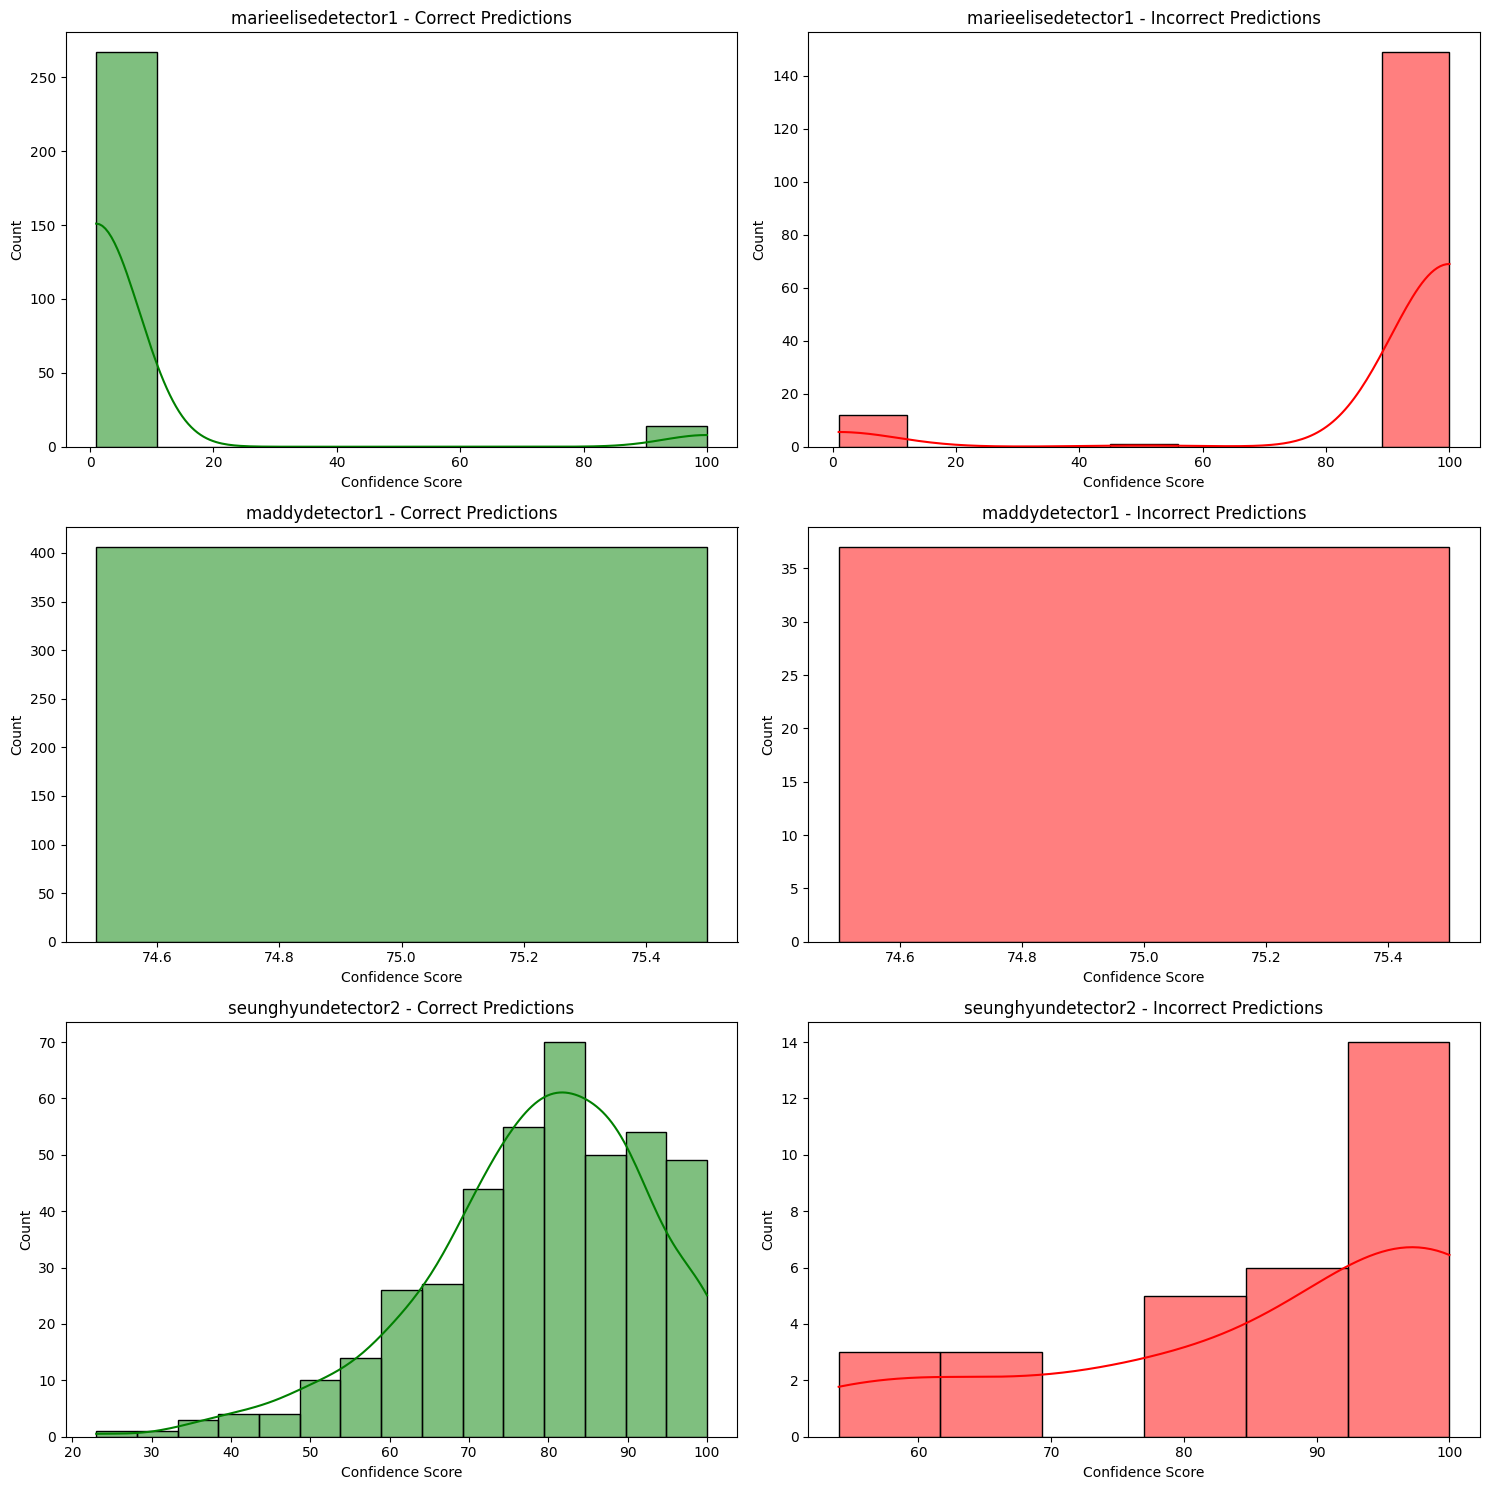

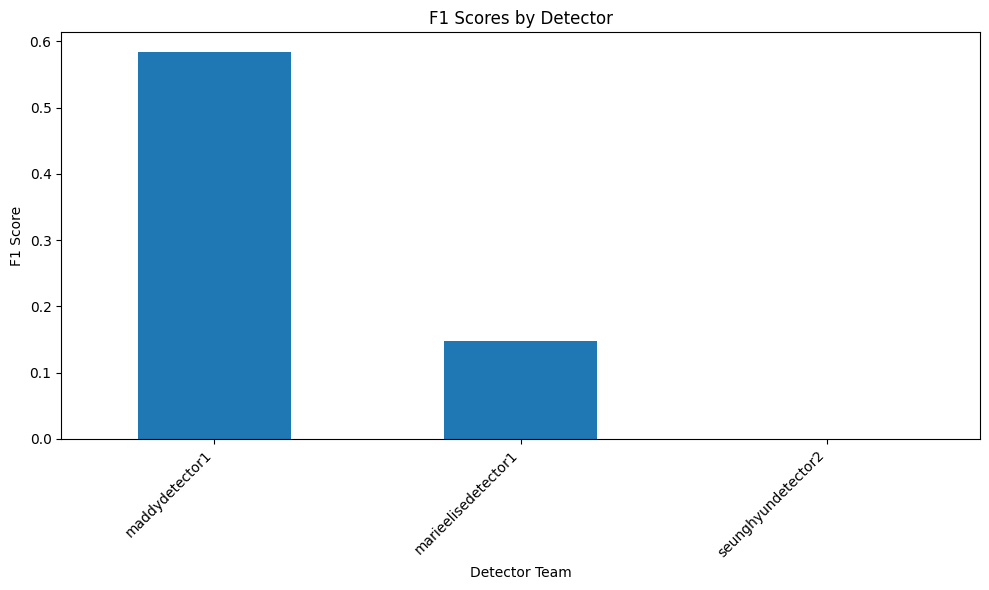

In [45]:
# Separate posts by bots vs real accounts
posts_df['is_bot'] = posts_df['author_id'].apply(is_bot)
bot_posts = posts_df[posts_df['is_bot']]
real_posts = posts_df[~posts_df['is_bot']]

# Prepare detector data
detector_data = []
for _, user in users_df.iterrows():
    true_label = is_bot(user['id'])
    for detector in user['detectors']:
        detector_data.append({
            'user_id': user['id'],
            'teamName': detector['teamName'],
            'isBot': detector['isBot'],
            'confidence': detector['confidence'],
            'true_label': true_label
        })

detector_df = pd.DataFrame(detector_data)

# Calculate F1 scores per detector
f1_scores = detector_df.groupby('teamName').apply(lambda x: f1_score(x['true_label'], x['isBot']))
print("F1 Scores per Detector:")
print(f1_scores)

# Plot confidence distributions per detector
unique_detectors = detector_df['teamName'].unique()
n_detectors = len(unique_detectors)
fig, axes = plt.subplots(n_detectors, 2, figsize=(15, 5 * n_detectors))

for i, detector in enumerate(unique_detectors):
    detector_data = detector_df[detector_df['teamName'] == detector]
    
    # True positives and true negatives
    sns.histplot(detector_data[detector_data['true_label'] == detector_data['isBot']]['confidence'], 
                 ax=axes[i, 0], kde=True, color='green')
    axes[i, 0].set_title(f"{detector} - Correct Predictions")
    axes[i, 0].set_xlabel("Confidence Score")
    axes[i, 0].set_ylabel("Count")
    
    # False positives and false negatives
    sns.histplot(detector_data[detector_data['true_label'] != detector_data['isBot']]['confidence'], 
                 ax=axes[i, 1], kde=True, color='red')
    axes[i, 1].set_title(f"{detector} - Incorrect Predictions")
    axes[i, 1].set_xlabel("Confidence Score")
    axes[i, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Plot F1 scores
plt.figure(figsize=(10, 6))
f1_scores.plot(kind='bar')
plt.title("F1 Scores by Detector")
plt.xlabel("Detector Team")
plt.ylabel("F1 Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()